In [1]:
import pandas as pd
import numpy as np

# Esto es para que muestre todas las columnas cuando visualizamos
pd.set_option("display.max_columns", None)

# Vamos a probar 2 algoritmos muy típicos que están en la librería scikit-learn
# Regresión Logística y RadomForest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Vamos también a probar 1 algoritmo muy típico como es xgboost (lo hemos instalado a mayores)
# scikit-learn tiene algoritmos de descenso de gradiente, pero no xgboost
# En total probaremos 3 algoritmos diferentes
# conda install -c anaconda py-xgboost
# pip install xgboost

import xgboost as xgb

# Importamos de scikit-learn lo que necesitamos para entrenar y mostrar algún resultado

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Importamos de la librería yellowbrick que hemos instalado funciones para visualization de resultados
# conda install -c districtdatalabs yellowbrick
# pip install yellowbrick

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix


In [2]:
# Cargamos nuestros fichero de datos limpio en nuestro dataframe (df)
# Si mejoramos la limpieza, siempre partimos aquí de este fichero, que es la salida del anterior notebook
# Quitamos la columna "Unnamed: 0" que añade al leer el fichero con un índice.

df = pd.read_csv('.\\data\\TotalSemana_clean.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,EasyLabel,Label_category
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0.0
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0.0
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0.0
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0.0
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0,0.0


In [3]:
df.shape

(2300825, 73)

## Regresión logistica

Normalizamos los datos para regresion logistica

In [4]:
# Definimos una función de normalización muy habitual, que nos deja los datos entre 0 y 1

def norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

In [5]:
# Creamos un nuevo dataframe df_norm con las mismas etiquetas que df y las variables numéricas normalizadas
# con la función norm que hemos definido

df_norm = pd.DataFrame()

for col in df.columns:
    if (col == 'Label')|(col == 'EasyLabel')|(col == 'Label_category'):
        df_norm[col] = df[col]
    else:
        df_norm[col] = norm(df[col])
        
df_norm.shape

(2300825, 73)

In [6]:
df_norm.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,EasyLabel,Label_category
0,0.001343,0.000005,0.000029,0.000014,0.000034,5.709729e-07,0.008864,0.0,0.010580,0.015228,0.009165,0.0,0.015430,0.012611,0.112504,0.336198,6.416666e-07,0.000002,0.000004,1.250000e-07,0.000005,8.888889e-07,0.000002,0.000004,1.083333e-07,0.000004,0.000001,0.000004,0.000004,3.333333e-08,0.0,0.0,0.999864,0.994727,0.003646,0.003125,0.0,0.008864,0.019927,0.020924,0.000438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.018633,0.010580,0.015430,0.999864,0.000029,0.000034,0.000014,5.709306e-07,0.125015,0.031342,0.00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0.0
1,0.001343,0.000008,0.000038,0.000014,0.000047,4.695375e-06,0.012087,0.0,0.011222,0.018766,0.075371,0.0,0.126886,0.103709,0.113658,0.335741,7.333333e-07,0.000002,0.000006,1.250000e-07,0.000008,9.375000e-07,0.000003,0.000006,1.083333e-07,0.000006,0.000002,0.000005,0.000006,2.500000e-08,0.0,0.0,0.999864,0.994727,0.003333,0.002222,0.0,0.059307,0.075856,0.111472,0.012419,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.070021,0.011222,0.126886,0.999864,0.000038,0.000047,0.000014,4.695027e-06,0.125015,0.031342,0.00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0.0
2,0.001343,0.000010,0.000029,0.000014,0.000215,4.513557e-06,0.055923,0.0,0.066753,0.096075,0.072453,0.0,0.121972,0.099693,0.113965,0.334855,1.112500e-06,0.000003,0.000007,1.250000e-07,0.000010,1.673611e-06,0.000005,0.000008,1.083333e-07,0.000008,0.000003,0.000006,0.000007,8.333333e-09,0.0,0.0,0.999864,0.994727,0.001936,0.001660,0.0,0.057010,0.139990,0.145851,0.021261,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.130900,0.066753,0.121972,0.999864,0.000029,0.000216,0.000014,4.513223e-06,0.125015,0.031342,0.00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0.0
3,0.001343,0.000004,0.000029,0.000014,0.000035,5.901116e-07,0.009106,0.0,0.010869,0.015643,0.009473,0.0,0.015947,0.013034,0.112659,0.336921,5.341666e-07,0.000001,0.000003,1.250000e-07,0.000004,7.097222e-07,0.000002,0.000003,1.083333e-07,0.000004,0.000001,0.000003,0.000003,8.333333e-09,0.0,0.0,0.999864,0.994727,0.004566,0.003914,0.0,0.009106,0.020527,0.021544,0.000464,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.019194,0.010869,0.015947,0.999864,0.000029,0.000035,0.000014,5.900680e-07,0.125015,0.031342,0.00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0.0
4,0.001343,0.000007,0.000038,0.000014,0.000047,4.695375e-06,0.012329,0.0,0.011446,0.019141,0.075371,0.0,0.126886,0.103709,0.113943,0.336136,6.451388e-07,0.000002,0.000005,1.250000e-07,0.000006,8.052083e-07,0.000002,0.000005,1.083333e-07,0.000006,0.000002,0.000004,0.000005,8.333333e-09,0.0,0.0,0.999864,0.994727,0.003881,0.002587,0.0,0.059307,0.076113,0.111491,0.012423,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.070258,0.011446,0.126886,0.999864,0.000038,0.000048,0.000014,4.695027e-06,0.125015,0.031342,0.00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0.0


In [18]:
# Divisón de los datos una vez normalizados en entrenamiento y test. Un 70% para entrenar y un 30% para test

X_norm, y_norm = df_norm.iloc[:,:-3],df_norm['EasyLabel']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm.values, y_norm.values, test_size=0.30, random_state=0)

In [8]:
# Definimos nuestro clasificador (clf) como la Regresión Logística con reguralizacion l2 -por defecto- (es la típica en ML)
# Usamos como solver sag, que es el recomendado para grandes set de datos y que nos ha obligado a normalizar

clf = LogisticRegression(solver = 'sag')

# Entrenamos (ajustamos, fit) el modelo con los datos de entrenamiento

clf = clf.fit(X_train_norm, y_train_norm) # Este es el entrenamiento de sklearn para sacar accuracy y AUROC

In [9]:
# clf.score nos da el accuracy
score = clf.score(X_test_norm, y_test_norm)
score

0.9264452776393413

In [10]:
# Los parámetros son la etiqueta del test y la probabilidad de ser 1 de cada fila del test
# calculada con nuestro clasificador entrenado (clf)
# Le pasamos probabilidad en vez de etiqueta para que construya la curva.
# El va poniendo puntos de corte en probabilidad y calculando la etiqueta
# de cada fila en función de su probabilidad. Calcula la sensibilidad y especificidad
# en cada punto de corte.

roc_auc_score(y_test_norm, clf.predict_proba(X_test_norm)[:, 1])

0.9727436143893456

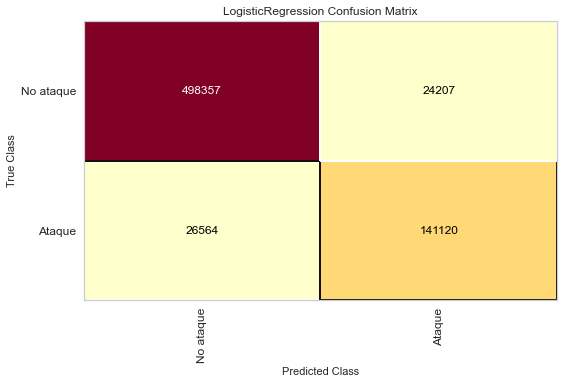

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
# Mostrar la matriz de confusión con Yellowbrick

cm = ConfusionMatrix(clf, classes=['No ataque', 'Ataque'])

cm.fit(X_train_norm, y_train_norm) # Tenemos que volver a entrenarlo para visualizarlo con yellowbrick
cm.score(X_test_norm, y_test_norm) # Esto es para que genere los resultados, evalúe el modelo
cm.show()                          # La visualización

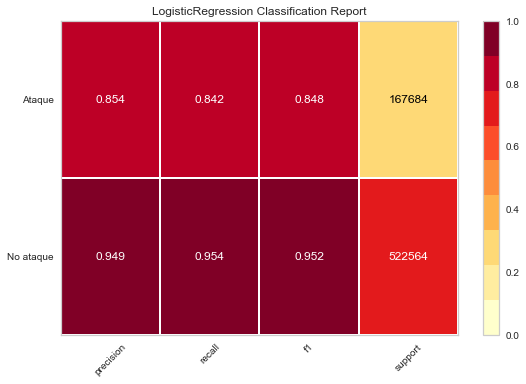

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [12]:
# Igual que para la matriz de confusión, lo hago para el ClassificationReport

visualizer = ClassificationReport(clf, classes=['No ataque', 'Ataque'], support=True)

visualizer.fit(X_train_norm, y_train_norm)
visualizer.score(X_test_norm, y_test_norm)
visualizer.show()

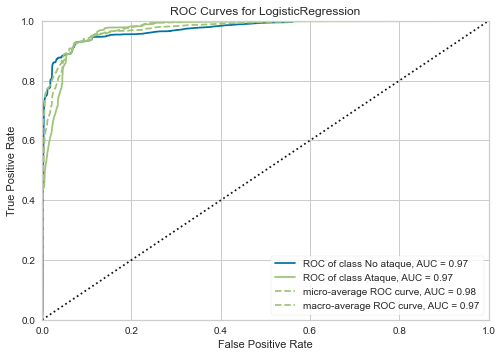

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
# Igual que para la matriz de confusión, lo hago para el área bajo la curva ROC (ROCAUC)

visualizer = ROCAUC(clf, classes=['No ataque', 'Ataque'])

visualizer.fit(X_train_norm, y_train_norm)
visualizer.score(X_test_norm, y_test_norm)
visualizer.show()

## Random Forest

In [19]:
# Divisón de los datos, usando la etiqueta de ataque sí (1), ataque no (0), que es EsasyLabel
# Dividimos un 70% para entrenar y un 30% de test

X, y = df.iloc[:,:-3],df['EasyLabel']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=0)

In [38]:
# Definimos nuestro clasificador y entrenamos (ajustamos)

rf = RandomForestClassifier(max_depth=3)
rf = rf.fit(X_train, y_train)

In [39]:
score = rf.score(X_test, y_test)
score

0.9296702054913596

In [40]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.9862920618575399

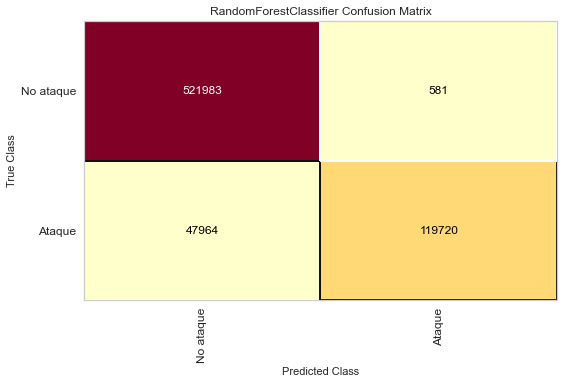

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
cm = ConfusionMatrix(rf, classes=['No ataque', 'Ataque'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

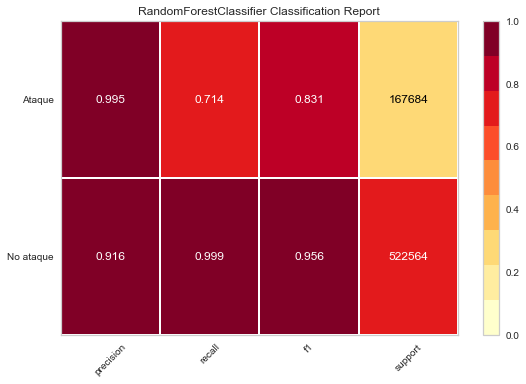

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [50]:
visualizer = ClassificationReport(rf, classes=['No ataque', 'Ataque'], support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

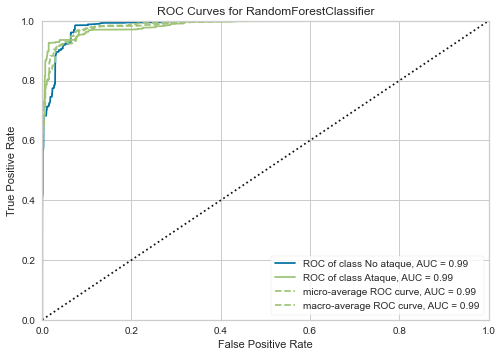

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
visualizer = ROCAUC(rf, classes=['No ataque', 'Ataque'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## xGBoost

In [44]:
# Utilizamos la misma división de datos que en Radom Forest (X_train, y_train, X_test, y_test)

# Definimos nuestro clasificador y entrenamos (ajustamos)
xGboost = xgb.XGBClassifier(max_depth = 3)
xGboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
score = xGboost.score(X_test, y_test)
score

0.9986164393087702

In [46]:
roc_auc_score(y_test, xGboost.predict_proba(X_test)[:, 1])

0.9999131402454473

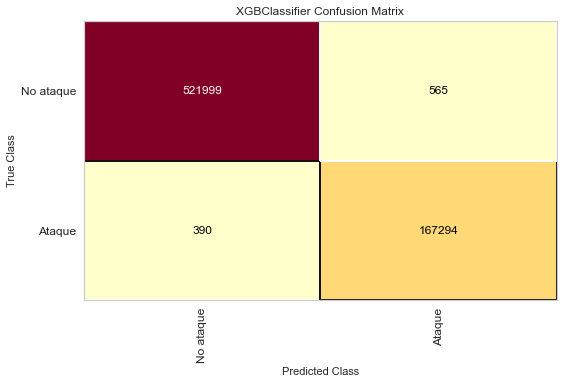

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
cm = ConfusionMatrix(xGboost, classes=['No ataque', 'Ataque'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

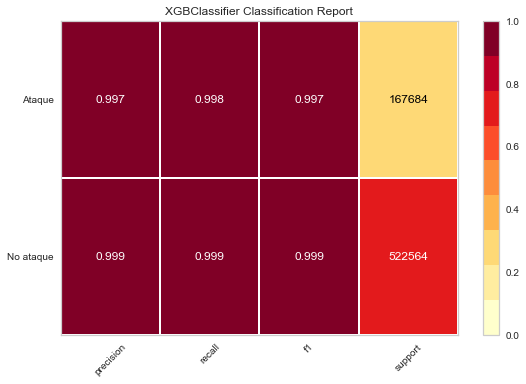

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [51]:
visualizer = ClassificationReport(xGboost, classes=['No ataque', 'Ataque'], support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

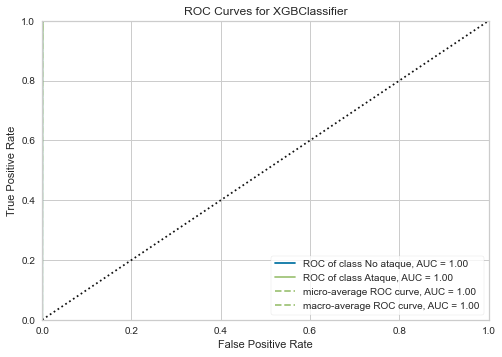

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
visualizer = ROCAUC(xGboost, classes=['No ataque', 'Ataque'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()